# Machine Learning Assignment

Welcome to the Machine Learning assignment! This assignment is designed to test your understanding of the fundamental concepts of machine learning. You will be working with a dataset to implement and evaluate various machine learning models. Please follow the instructions carefully and ensure you understand each step before proceeding. Good luck!


# 0. Dataset for Classification Task

In this assignment, you will be working with a dataset designed for a binary classification task. The dataset consists of three features and a target variable. Here's a brief overview:

- **Features**: The dataset contains three features (`Feature_1`, `Feature_2`, and `Feature_3`). These features are numerical and may have varying scales.

- **Target**: The target variable is binary, indicating two classes. The distribution of classes might vary, so it's crucial to check the class balance before proceeding with model training.

To generate your dataset, follow the instructions in section 0.1.


In [12]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
def generate_dataset(student_id):
    # Seed the random number generator
    np.random.seed(student_id)

    # Randomly decide class separation
    class_sep_choices = [2.5, 1.0, 0.25]
    class_sep = np.random.choice(class_sep_choices)

    # Randomly decide class balance
    weights_choices = [[0.8, 0.2],[0.6, 0.4], [0.7, 0.3], [0.5, 0.5], [0.4, 0.6], [0.3, 0.7],[0.2, 0.8]]
    weights = weights_choices[np.random.randint(len(weights_choices))]

    # Generate dataset using make_classification
    X, y = make_classification(n_samples=1000, n_features=3, n_informative=3, n_redundant=0, n_classes=2, class_sep=class_sep, weights=weights, random_state=student_id)

    # Convert to DataFrame for better visualization
    df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2', 'Feature_3'])
    df['Target'] = y

    return df

## 0.1. Generating Your Dataset

To generate your dataset for this assignment, you need to:

1. Run the cell above to load the dataset generation function.
2. In the cell below, replace `YOUR_STUDENT_ID_1` and `YOUR_STUDENT_ID_2` with your actual student IDs and then run the cell. This will generate your dataset for the assignment.


In [13]:
# Replace YOUR_STUDENT_ID with your actual student ID
student_id_1 = 202132090  # Student Id for the first student in the group. Example = 2022...
student_id_2 = 202132090 # Student Id for the second student in the group.  Example = 2022...
# Note: If only one person in the group then enter your ID(same id) in both the above fields
dataset = generate_dataset(student_id_1 + student_id_2)
dataset.head()


,Feature_1,Feature_2,Feature_3,Target
0,0.661852,-1.277922,1.796872,0
1,-0.914252,-0.755707,0.538741,0
2,-0.884287,0.193692,-0.667230,1
3,-0.884725,-0.969422,-3.164371,1
4,0.221379,-2.666622,1.026567,0


# 1.1 Data Exploration

Data exploration is the initial step in data analysis, where users explore a large dataset in an unstructured manner to uncover initial properties, characteristics, and patterns in the data. It's crucial because it allows you to understand the dataset's underlying structure, detect outliers or anomalies, and find interesting patterns.

For this assignment, we will guide you through some basic techniques of data exploration. While we provide specific methods to explore, you are encouraged to dive deeper and explore additional techniques as you see fit.

Let's start with some basic statistical measures: Mean, Median, and Mode.


In [14]:
def compute_statistics(data):
    """
    Compute basic statistics: Mean, Median, and Mode for the given data.

    Parameters:
    - data: A pandas DataFrame containing the dataset.

    Returns:
    - Each value should be rounded to 3 decimal places
    - mean: A dictionary with the mean of each feature.
    - median: A dictionary with the median of each feature.
    - mode: A dictionary with the mode of each feature.
    """
    # TODO: Replace the 'None' with your code to calculate the mean
    mean = data.mean()
    #https://www.geeksforgeeks.org/python-pandas-dataframe-mean/

    # TODO: Replace the 'None' with your code to calculate the median
    median = data.median()

    # TODO: Replace the 'None' with your code to calculate the mode
    mode = data.median()

    # Round each one to 3 decimal places
    # https://bobbyhadz.com/blog/python-round-float-3-decimal-places
    statistics = {
        'mean': round(mean, 3),
        'median': round(median, 3),
        'mode': round(mode, 3)
    }
    return statistics
compute_statistics(dataset)

{'mean': Feature_1   -0.006
 Feature_2    0.583
 Feature_3   -0.585
 Target       0.795
 dtype: float64,
 'median': Feature_1    0.049
 Feature_2    0.710
 Feature_3   -0.642
 Target       1.000
 dtype: float64,
 'mode': Feature_1    0.049
 Feature_2    0.710
 Feature_3   -0.642
 Target       1.000
 dtype: float64}

# 1.2 Dataset Distribution Exploration

Understanding the distribution of your dataset, particularly the target variable, is a fundamental aspect of preparing your data for machine learning. The distribution tells you about the balance or imbalance between classes, which is essential since imbalanced classes can significantly affect the performance and evaluation of your machine learning models.

For classification tasks, it's crucial to know whether one class is overrepresented compared to others. If one class dominates, the model might simply learn to always predict that class, ignoring the features.

In this section, you will learn how to visualize the distribution of the target variable in your dataset using a pie chart. This type of visualization will provide you with a clear and immediate understanding of the class balance.


Below is a function `plot_target_distribution` that generates a pie chart that visualizes the distribution of the target variable in your dataset.

This exercise is for your learning and understanding of the data you will be working with. There are no graded questions associated with this section.


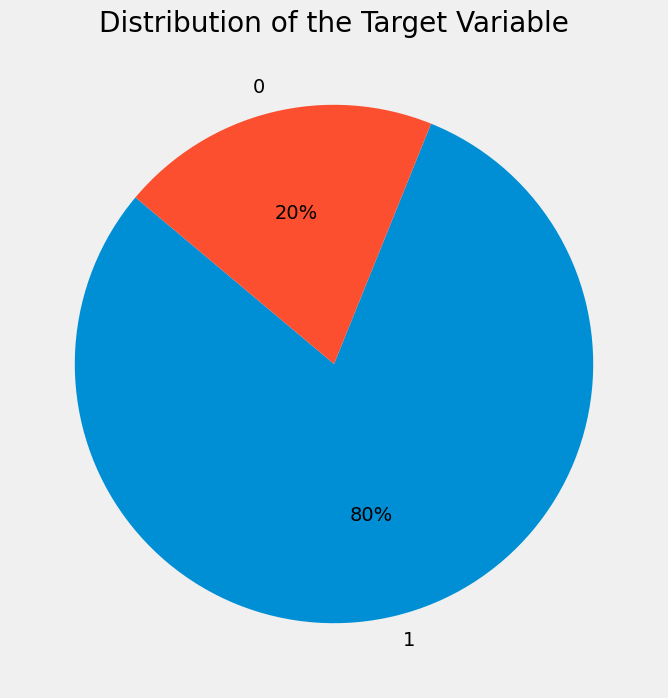

In [15]:
import matplotlib.pyplot as plt

def plot_target_distribution(data):
    """
    Plot the distribution of the target variable using a pie chart.

    Parameters:
    - data: A pandas DataFrame containing the dataset.

    Implements:
    - A pie chart visualizing the distribution of the target variable.
    """
    # Calculate the distribution of the target variable
    target_counts = data['Target'].value_counts(normalize=True).round(2)

    # Create a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(target_counts, labels=target_counts.index, autopct='%1.0f%%', startangle=140)
    plt.title('Distribution of the Target Variable')
    plt.show()

plot_target_distribution(dataset)

# 1.3 Visualizing Dataset Properties with Scatter Plots

Visualizing your dataset can provide valuable insights into its structure and properties. A scatter plot is a useful visual tool for understanding the relationships between variables in your dataset. For datasets with three features, a 3D scatter plot can be particularly insightful. It allows you to observe the interaction between the features and how they contribute to the separability of the target classes.

In this section, you will create a 3D scatter plot to visualize the three features of your dataset. By examining this plot, you can gain insights into the dataset's structure, such as the degree of overlap between classes, which can inform your choice of classification models and preprocessing steps.

**Hint**: You can use `Axes3D` from `mpl_toolkits.mplot3d` to create a 3D scatter plot. You can import it using `from mpl_toolkits.mplot3d import Axes3D`.

A

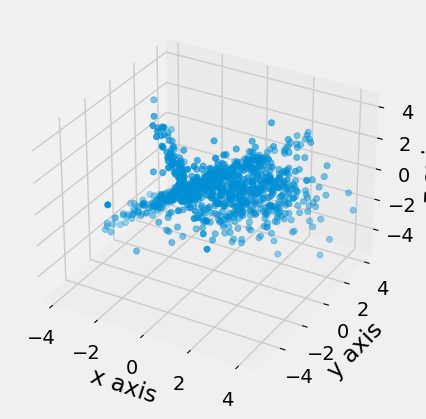

In [16]:
# TODO: Replace the 'None' with your code to create a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import style

def plot_3d_scatter(data):
    """
    Plot a 3D scatter plot of the dataset to visualize the three features.

    Parameters:
    - data: A pandas DataFrame containing the dataset.

    Returns:
    - A 3D scatter plot visualizing the dataset's features and target variable.
    """
    #https://matplotlib.org/stable/plot_types/3D/scatter3d_simple.html#sphx-glr-plot-types-3d-scatter3d-simple-py
    #https://pythonprogramming.net/3d-graphs-matplotlib-tutorial/
    # Your code here

style.use('fivethirtyeight')

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

x = dataset.Feature_1
y = dataset.Feature_2
z = dataset.Feature_3

ax1.scatter(x,y,z)

ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')

plt.show()

plot_3d_scatter(dataset)


## 1.4 Visualizing Data Distribution with Box Plots

Box plots are a convenient way of visually displaying the data distribution through their quartiles. They can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

Here's what each part of a box plot represents:

- **Median (Q2/50th Percentile)**: the middle value of the dataset.
- **First quartile (Q1/25th Percentile)**: the median of the first half of the dataset.
- **Third quartile (Q3/75th Percentile)**: the median of the second half of the dataset.
- **Interquartile range (IQR)**: the distance between the first and third quartiles.
- **Whiskers**: the lines that extend from the quartiles to the maximum and minimum values, excluding outliers.
- **Outliers**: points that fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.

By visualizing these aspects, box plots allow us to compare the distributions of different features or datasets in a compact manner.

Let's create box plots for each feature in your dataset to analyze their distribution.


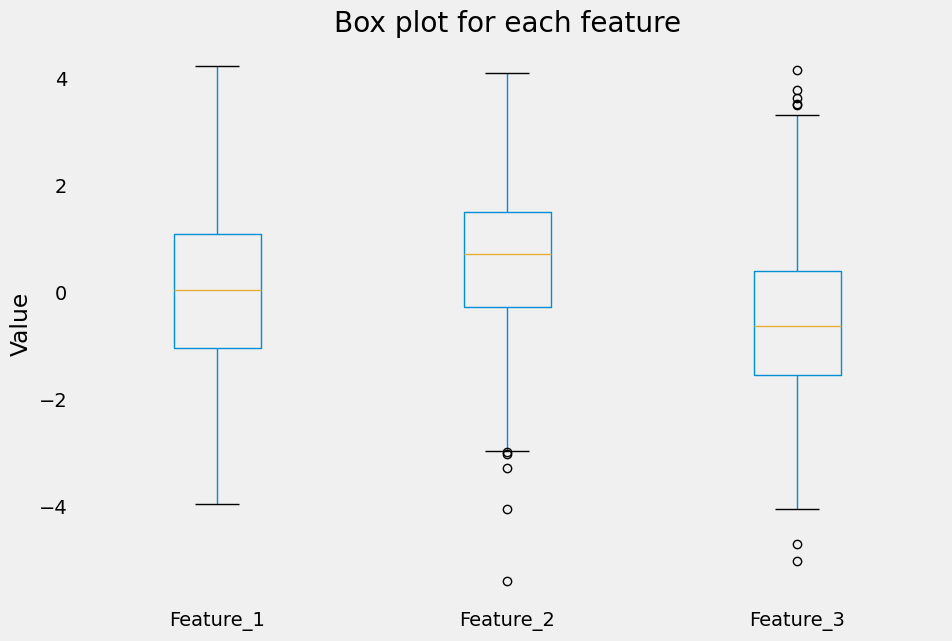

In [17]:
import matplotlib.pyplot as plt

def plot_boxplots(data):
    """
    Plot box plots for each feature in the dataset.

    Parameters:
    - data: A pandas DataFrame containing the dataset.

    Returns:
    - Box plots visualizing the distribution of each feature.
    """
    # Prepare the figure
    plt.figure(figsize=(10, 7))

    # Create a box plot for each feature in the dataset
    data.boxplot(column=['Feature_1', 'Feature_2', 'Feature_3'])

    # Set the title and labels
    plt.title('Box plot for each feature')
    plt.ylabel('Value')
    plt.grid(False)
    plt.show()

# Call the function to plot the box plots
plot_boxplots(dataset)

## 1.5 Visualizing Feature Distribution with Density Plots

When preparing data for machine learning, it's important to understand the scale of each feature. Features on different scales can influence the model in disproportionate ways, especially in algorithms that are sensitive to the magnitude of the data, like SVMs or k-NN.

Density plots are useful for visualizing the distribution of each feature on its own scale. By examining these plots, we can determine if features need to be rescaled or normalized so that no single feature dominates the learning algorithm due to its scale.

Let's create density plots for each feature in your dataset to analyze their distribution and compare their scales.


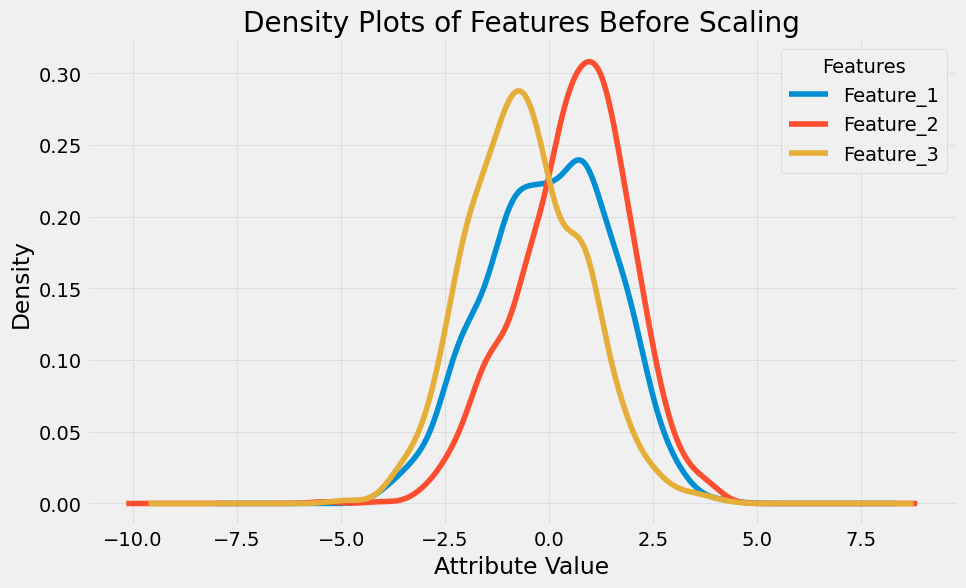

In [18]:
def plot_density_scaling(data):
    """
    Plot density plots for all features on the same graph to visualize their distribution before scaling.

    Parameters:
    - data: A pandas DataFrame containing the dataset.

    Returns:
    - A combined density plot visualizing the distribution of all features.
    """
    features = data.drop(columns=['Target'])

    # Plotting combined density plots for all features
    features.plot(kind='density', figsize=(10, 6))
    plt.title('Density Plots of Features Before Scaling')
    plt.xlabel('Attribute Value')
    plt.ylabel('Density')
    plt.legend(title='Features')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

plot_density_scaling(dataset)

# 2 k-NN Classification

## 2.1 k-NN Classification Using Raw/Unscaled Data

In this section, you will apply the k-Nearest Neighbors (k-NN) algorithm to classify data points using the raw values of the features. You will use a fixed `k=5` for the number of neighbors to maintain consistency in the classification process.

You will perform a train-test split and report the model's performance metrics based on the testing set(to answer the questions as well). This will help you understand how well the model is learning from the data provided.

After training the classifier, you will compute a confusion matrix on the testing set, which will give you detailed insights into the true positives, true negatives, false positives, and false negatives(and answer the question based on that). These metrics are essential for a comprehensive understanding of your model's performance.

In [19]:
# Hint you can use the following functions from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

def knn_raw_data_metrics(data):
    """
    Perform k-NN classification on raw data and compute the confusion matrix based on the testing set.

    Parameters:
    - data: A pandas DataFrame containing the dataset.

    Returns:
    - A dictionary containing the confusion matrix and other relevant metrics based on the testing set.
    """
    # Split the data into features and target
    # TODO: Replace None with the appropriate code to extract features and target
    X = dataset.drop(['Target'], axis=1)

    y =dataset['Target']
    #https://stackoverflow.com/questions/74067646/i-want-to-split-my-dataset-into-a-set-of-features-x-and-variable-y-in-python


    # TODO: Replace None with the appropriate code to split the data
    # Use a fixed random_state to ensure reproducibility
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the k-NN classifier with k=5 =>n_neighbors=5
    knn = KNeighborsClassifier(n_neighbors = 5)
    #https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

    # TODO: Replace None with the appropriate code to fit the classifier and make predictions on the training set
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

#https://stackoverflow.com/questions/45854885/calculate-confusion-matrix-for-training-set
    # Compute the confusion matrix based on the testing set
    cm_test = confusion_matrix(y_test, y_pred)
    # TODO: Replace None with the appropriate code to calculate other metrics based on the testing set
#https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case

    wclf = SVC(kernel='linear', C= 1, class_weight={1: 10})
    wclf.fit(X, y)
    weighted_prediction = wclf.predict(X_test)
    # Note: Convert the metrics to percentage(out of 100) and round them to the nearest integer
    metrics_test = {
        'accuracy': round(accuracy_score(y_test, weighted_prediction) * 100),
        'precision': round(precision_score(y_test, weighted_prediction, average='weighted') * 100),
        'recall': round(recall_score(y_test, weighted_prediction, average='weighted') * 100),
    }

    return metrics_test, cm_test
knn_raw_data_metrics(dataset)

({'accuracy': 94, 'precision': 95, 'recall': 94},
 array([[ 33,   3],
        [  1, 163]]))

[link text](https://)## 2.2 Finding the Best Value for \( k \) using Cross-Validation

Cross-validation is a technique used to assess how the results of a statistical analysis will generalize to an independent dataset. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice.

For k-NN, selecting the right \( k \) is crucial as it determines how well the model generalizes to new data. A \( k \) that's too low can lead to overfitting, where the model captures noise in the data. Conversely, a \( k \) that's too high can lead to underfitting, where the model can't capture the underlying trends.


You will perform 10-Fold cross-validation for values of \( k \) ranging from 1 to 30 and plot the error rates to find the best \( k \). Remember to set a fixed `random_state` in your K-Fold to ensure that your results are reproducible.


The best k value is: 5 and 0.02


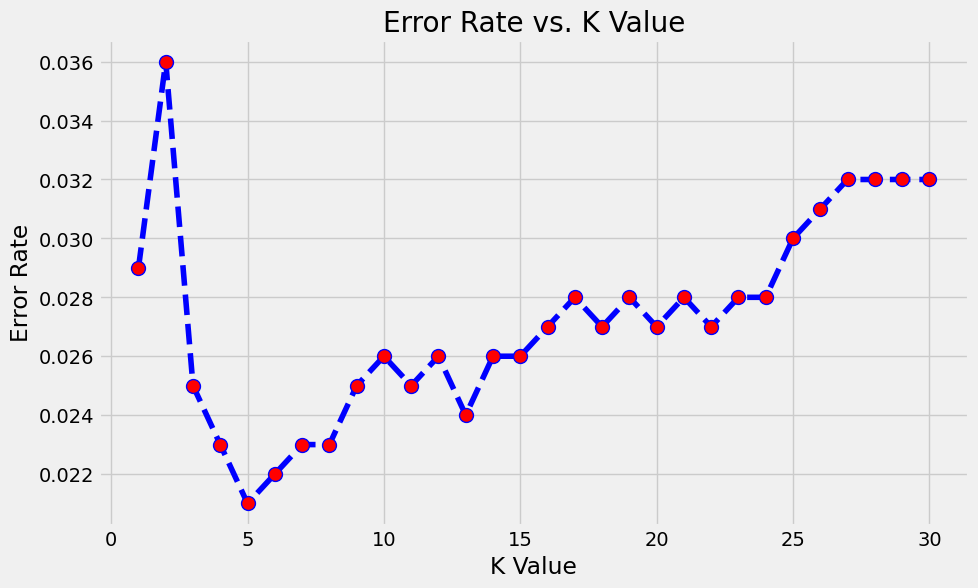

In [20]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#used chatgpt
def find_best_k_using_cross_validation(data):
    # TODO: Split the data into features (X) and target (y)
    X =  dataset.drop(['Target'], axis=1)
    y = dataset['Target']

    # TODO: Initialize a list to store error rates for each k value
    error_rates = []

    # Define the K-Fold cross-validator with a fixed random state -- dont change this
    kf = KFold(n_splits=10, random_state=42, shuffle=True)

    # TODO: Loop over k values from 1 to 30
    for k in range(1, 31):
        # TODO: Implement k-NN with current k value
        knn = KNeighborsClassifier(n_neighbors=k)

        # TODO: Use cross_val_score to perform cross-validation
        scores = cross_val_score(knn, X, y, cv=kf)

        # TODO: Compute the mean error rate and append to the list
        error_rate = 1 - np.mean(scores)
        error_rates.append(error_rate)

    # TODO: Find the k value with the minimum error rate
    best_k = np.argmin(error_rates) + 1

    # TODO: Return the best k value and the error rates list
    # Note: Remember to round the best(min)_error_rate to 2 decimal places
    best_error_rate = round(min(error_rates), 2)
    return best_k, error_rates, best_error_rate

best_k, error_rates,best_error_rate = find_best_k_using_cross_validation(dataset)

# Plotting the error rates
print(f"The best k value is: {best_k} and {best_error_rate}")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), error_rates, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()

#used chat gpt


## 2.3 Effects of Scaling on Data

Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step. Scaling is critical for algorithms that calculate distances between data points, such as k-Nearest Neighbors (k-NN), because features on larger scales can unduly influence the algorithm.

In this section, we will scale our dataset using `StandardScaler` from `sklearn.preprocessing`. This scaler removes the mean and scales each feature/variable to unit variance. This standardization of features ensures that each feature contributes equally to the distance computations.

We will then compare the range of values (max - min) for each feature before and after scaling to understand the effect of this transformation. Additionally, we will visualize the density vs. value graphs for each feature to see how scaling affects the distribution of the data.

You need to proceed with scaling the data, plotting the density graphs, and computing the range of values for each feature.


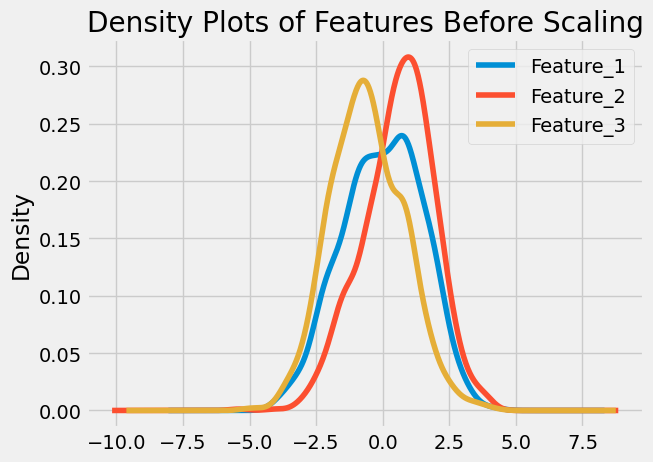

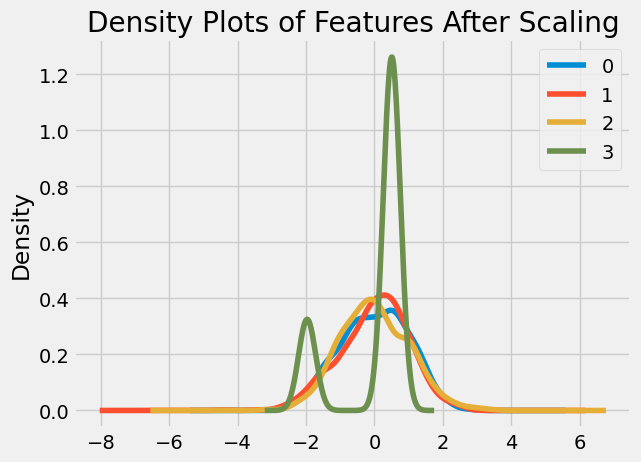

In [24]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def scale_data_plot_and_compute_ranges(data):
    """
    Scale the data using StandardScaler, plot the density vs. value graphs for each feature,
    and compute the range of values for each feature before and after scaling.

    Parameters:
    - data: A pandas DataFrame containing the dataset.

    Returns:
    - ranges_before: A dictionary with the range of values for each feature before scaling.
    - ranges_after: A dictionary with the range of values for each feature after scaling.
    """
    # Separate the features from the target variable
    features = data.drop(columns=['Target'])

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit the scaler to the features and transform them (do not return anything yet) https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler
    scaled_features = scaler.fit_transform(data)


    # Create a DataFrame from the scaled features with the same column names as the original features DataFrame
    #Used chat gpt
    scaled_df = pd.DataFrame(scaled_features)


    # Compute the range (max - min) for each feature before scaling
    ranges_before = dict(features.apply(lambda x: round(x.max() - x.min())))

    # Compute the range (max - min) for each feature after scaling
    ranges_after = dict(scaled_df.apply(lambda x: round(x.max() - x.min())))

    # Plot the density plots for the original features
    features.plot(kind='density', title='Density Plots of Features Before Scaling')
    plt.show()

    # Plot the density plots for the scaled features
    scaled_df.plot(kind='density', title='Density Plots of Features After Scaling')
    plt.show()

    # Return the computed ranges
    # Note: You need to round the ranges to nearest integer
    return ranges_before, ranges_after

# Call the function with the dataset
ranges_before, ranges_after = scale_data_plot_and_compute_ranges(dataset)


## 2.4 Finding the Optimal k for k-NN using Normalized Data

In this section, you'll explore how normalization affects the performance of the k-Nearest Neighbors (k-NN) classifier. We will use 10-fold-cross-validation to determine the best `k` value for our classifier.

Your task is to implement the cross-validation process for `k` values ranging from 1 to 30 and to identify the `k` value that minimizes the error rate.



The best k value is: 4 and 0.02


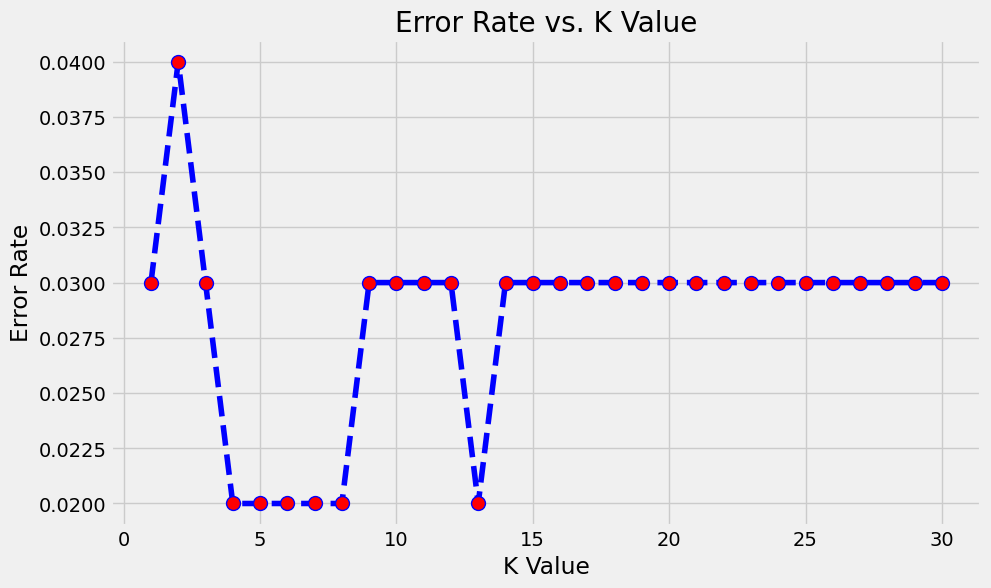

In [26]:
from sklearn.preprocessing import StandardScaler

#used chatgpt
def find_best_k_using_cross_validation_normalized(data):
    """
    Normalize the data using StandardScaler and evaluate k-NN performance with normalized data.

    Parameters:
    - data: A pandas DataFrame containing the dataset.

    Returns:
    - normalized_data: A DataFrame containing the normalized data.
    - error_rates: A list containing error rates for each k value with normalized data.
    """
    #used chat gpt
    # TODO: Normalize the data using StandardScaler
    scaler = StandardScaler()


    # TODO: Split the normalized data into features (X) and target (y)
    X = data.drop(columns=['Target'])
    y = data['Target']

    X_scaled = scaler.fit_transform(X)


    # TODO: Initialize a list to store error rates for each k value
    error_rates = []

    # Define the K-Fold cross-validator with a fixed random state -- do not change this
    kf = KFold(n_splits=10, random_state=42, shuffle=True)

    # TODO: Loop over k values from 1 to 30
    for k in range(1, 31):
        # TODO: Implement k-NN with the current k value
        knn = KNeighborsClassifier(n_neighbors=k)

        # TODO: Use cross_val_score to perform cross-validation
        scores = cross_val_score(knn, X, y, cv=kf)

        # TODO: Compute the mean error rate and append to the list
        error_rate = 1 - scores.mean()
        error_rates.append(round(error_rate, 2))

    # TODO: Find the k value with the minimum error rate
    best_k = error_rates.index(min(error_rates)) + 1
    best_error_rate = min(error_rates)

    # TODO: Return the best k value and the error rates list
    # Note: Please round the best(min) error rate to 2 decimal point
    return best_k, error_rates,best_error_rate

best_k, error_rates,best_error_rate = find_best_k_using_cross_validation_normalized(dataset)

# Plotting the error rates
print(f"The best k value is: {best_k} and {best_error_rate}")
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), error_rates, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()

## 2.5 k-NN Classification on Normalized Data

In this section, we will address the importance of data preprocessing and its impact on the k-Nearest Neighbors (k-NN) algorithm. Proper preprocessing is crucial to prevent data leakage and ensure that our model generalizes well to unseen data.

### Process Overview

1. **Split the Data**: Start by dividing your dataset into a training set and a testing set. This step is essential to prevent any information from the test set from "leaking" into the training process.

2. **Normalize the Data**: After splitting, use a normalization technique such as `StandardScaler` to fit only on the training data. Then, apply this scaler to transform both the training and testing sets. This ensures that the test data is a fair representation of new, unseen data and is not influenced by the training set.

3. **Train the k-NN Classifier**: Train your k-NN classifier on the normalized training data. Use the optimal `k` value that you determined from previous exercises to achieve the best classification performance.

4. **Evaluate the Model**: Finally, evaluate your model's performance using the normalized test set. Compute the accuracy, precision and recall. Additionally, generate a confusion matrix to gain detailed insights into the true positives, true negatives, false positives, and false negatives.

By following this revised process, you will ensure that your evaluation of the k-NN classifier is based on a robust and unbiased assessment of its predictive performance.


In [34]:
# Hint you can use the following functions from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#used chatgpt
def knn_normalized_data_metrics(data, k):
    """
    Perform k-NN classification on data with normalization applied after splitting into training and testing sets.
    Compute the confusion matrix and other relevant metrics based on the test set.

    Parameters:
    - data: A pandas DataFrame containing the dataset.
    - k: The optimal k value for the k-NN classifier.

    Returns:
    - A dictionary containing the confusion matrix and other relevant metrics based on the test set.
    """
    # Split the data into training and testing sets first
    X = data.drop(columns=['Target'])
    y = data['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Do not change the random state

    # Normalize the training data and then apply the same transformation to the test data
    # Remember to prevent data leakage, only train/fit on training data, for testing data you just need to transform
    scaler = StandardScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)

    # Initialize the k-NN classifier with the optimal k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier on the normalized training data and make predictions on the normalized test set
    knn.fit(X_train_normalized, y_train)
    y_pred = knn.predict(X_test_normalized)


    # Compute the confusion matrix and other metrics based on the test set and round to nearest integer
    cm_test = confusion_matrix(y_test, y_pred)
    # Note: Convert the metrics to percentage(out of 100) and round them to the nearest integer
    metrics_test = {
        'accuracy': round(accuracy_score(y_test, y_pred) * 100),
        'precision': round(precision_score(y_test, y_pred) * 100),
        'recall': round(recall_score(y_test, y_pred) * 100)
    }

    return metrics_test, cm_test

# Replace 'optimal_k' with the actual optimal k value you have determined
optimal_k = 4 # ... (the optimal k value)

# Call the function with the dataset and the optimal k value
knn_normalized_data_metrics(dataset, optimal_k)


({'accuracy': 97, 'precision': 98, 'recall': 98},
 array([[ 33,   3],
        [  3, 161]]))

# 3 Perceptron Classifier on Normalized Data

The Perceptron is a fundamental linear classifier in machine learning, particularly effective for binary classification problems. In this section, you will learn how to properly train a Perceptron classifier on a dataset where normalization is applied correctly to prevent data leakage.

### Step 1: Splitting the Data
Before any data preprocessing, split your dataset into training and testing sets. This is a crucial step to prevent the leakage of information from the test set into the training process.

### Step 2: Normalizing the Training Data
Normalize `Feature_1` and `Feature_2` in the training data using a standard scaler. It's important to fit the scaler only on the training data and then transform both the training and testing sets with it.

### Step 3: Visualizing the Training Data
Visualize the distribution of the normalized `Feature_1` and `Feature_2` in the training data using a scatter plot. Understanding the structure of the data is essential before applying any machine learning model.

### Step 4: Training the Perceptron
With the normalized training data, train the Perceptron classifier. Your goal is to find an optimal decision boundary that can effectively distinguish between the two classes.

### Step 5: Visualizing the Decision Boundary on Training Data
After training, visualize the decision boundary on a scatter plot of the normalized training data. This will help you understand how well the Perceptron has learned to classify the training data.

### Step 6: Visualizing the Testing Data with the Decision Boundary
Apply the trained Perceptron to the normalized testing data and visualize the decision boundary. This will show how well the classifier generalizes to new, unseen data.

### Step 7: Evaluating Classifier Performance
Finally, evaluate the Perceptron's performance on the normalized testing set using metrics such as accuracy, recall, and precision. These metrics will give you a comprehensive view of the classifier's effectiveness on unseen data.


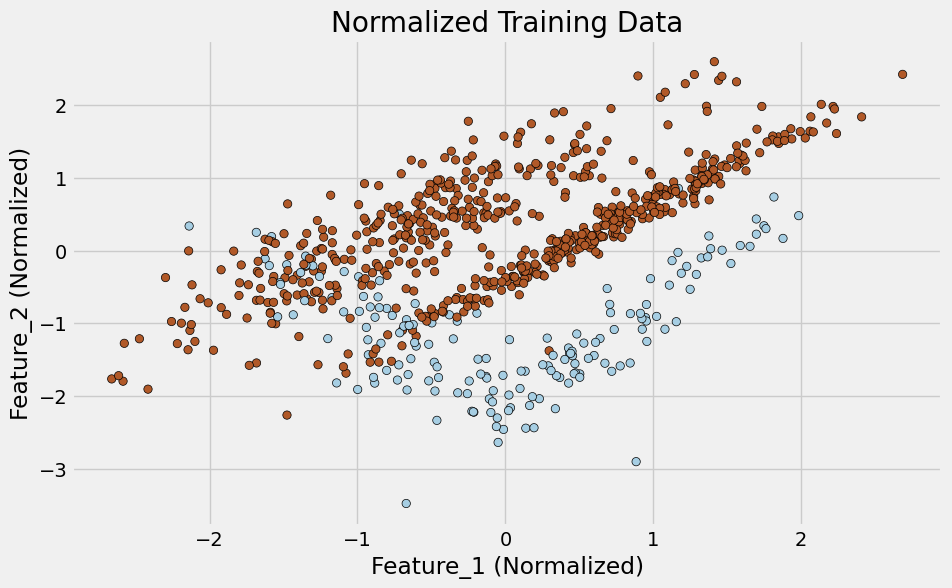

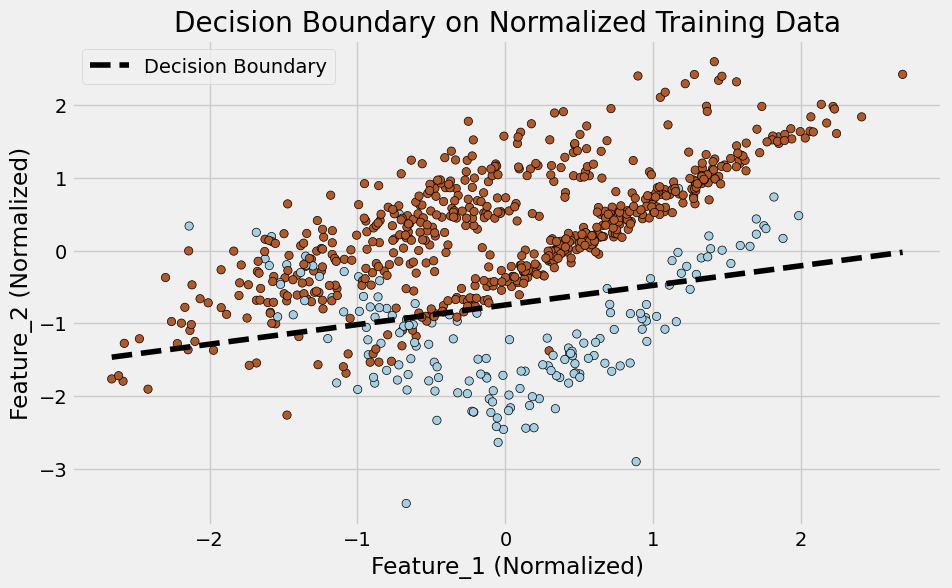

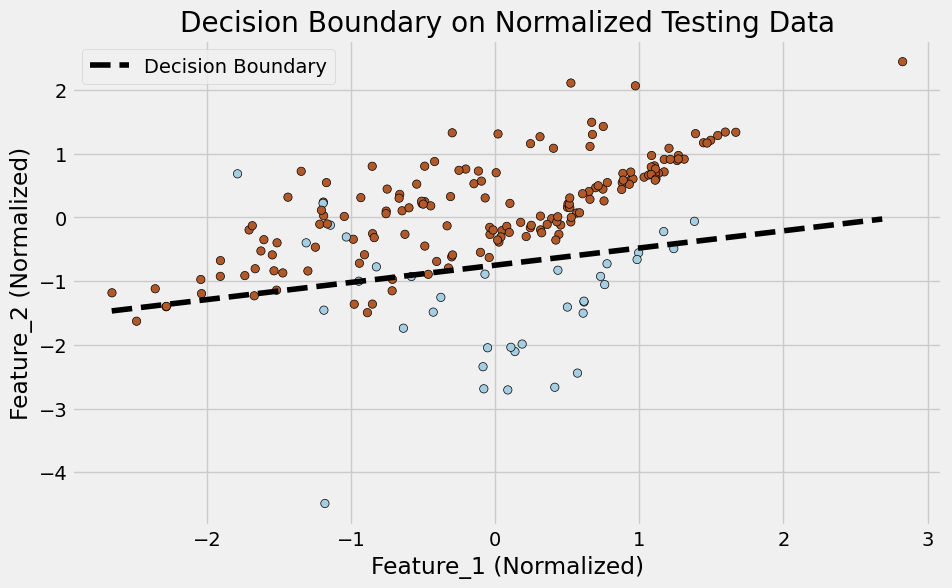

({'accuracy': 92, 'precision': 95, 'recall': 96},
 0.26990479237168324,
 0.30000000000000004)

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

#used chatgpt
def perceptron_classifier_on_normalized_data(data):
    """
    Train a Perceptron classifier on data with normalization applied after splitting into training and testing sets.
    Evaluate its performance and visualize the decision boundary.

    Parameters:
    - data: A pandas DataFrame containing the dataset with features and target.

    Returns:
    - A dictionary containing the classifier's performance metrics.
    - Slope and intercept of the decision boundary.
    """

    # Split the data into training and testing sets first
    # TODO: Extract Feature_1 and Feature_2, then split the data
    X = data.drop(columns=['Target'])
    y = data['Target']
    features = data[['Feature_1', 'Feature_2']]
    target = data['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Do not change the random state

    # Normalize the training data and then apply the same transformation to the test data
    # Remember to prevent data leakage, only train/fit on training data, for testing data you just need to transform
    scaler = StandardScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)

    # Visualize the normalized training data
    # TODO: Plot a scatter plot of the normalized training data
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train_normalized[:, 0], X_train_normalized[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor='k')
    plt.title('Normalized Training Data')
    plt.xlabel('Feature_1 (Normalized)')
    plt.ylabel('Feature_2 (Normalized)')
    plt.show()

    # Train the Perceptron classifier on the normalized training data
    # Initialize the Perceptron and fit it to the normalized training data
    perceptron = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
    perceptron.fit(X_train_normalized, y_train)


    # Evaluate the classifier's performance on the normalized testing set
    y_pred = perceptron.predict(X_test_normalized)

    # TODO: Make predictions on the normalized testing set and calculate performance metrics
    # Note: Convert the metrics to percentage(out of 100) and round them to the nearest integer
    metrics = {
        'accuracy': round(accuracy_score(y_test, y_pred) * 100),
        'precision': round(precision_score(y_test, y_pred) * 100),
        'recall': round(recall_score(y_test, y_pred) * 100),
    }

    # Calculate the slope and intercept of the decision boundary (round to 2 decimal)
    # TODO: Calculate the coefficients and intercept from the Perceptron to determine the decision boundary
    coefficients = perceptron.coef_[0]
    intercept = perceptron.intercept_[0]
    slope = -coefficients[0] / coefficients[1]

    # Visualize the decision boundary on the normalized training data
    # TODO: Plot the decision boundary on a scatter plot of the normalized training data
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train_normalized[:, 0], X_train_normalized[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor='k')
    x_vals = np.linspace(X_train_normalized[:, 0].min(), X_train_normalized[:, 0].max(), 100)
    y_vals = slope * x_vals - intercept / coefficients[1]
    plt.plot(x_vals, y_vals, '--k', label='Decision Boundary')
    plt.title('Decision Boundary on Normalized Training Data')
    plt.xlabel('Feature_1 (Normalized)')
    plt.ylabel('Feature_2 (Normalized)')
    plt.legend()
    plt.show()

    # Visualize the decision boundary on the normalized testing data
    # TODO: Plot the decision boundary on a scatter plot of the normalized testing data
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test_normalized[:, 0], X_test_normalized[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolor='k')
    plt.plot(x_vals, y_vals, '--k', label='Decision Boundary')
    plt.title('Decision Boundary on Normalized Testing Data')
    plt.xlabel('Feature_1 (Normalized)')
    plt.ylabel('Feature_2 (Normalized)')
    plt.legend()
    plt.show()


    return metrics, slope, intercept

perceptron_classifier_on_normalized_data(dataset)

# 4 SVM Classifier

Support Vector Machines (SVM) are a set of supervised learning methods used for classification, regression, and outliers detection. The advantages of support vector machines are:

- Effective in high dimensional spaces.
- Still effective in cases where the number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different kernel functions can be specified for the decision function.

For this exercise, you will:

1. Split your data into training and testing sets to prevent data leakage during normalization.
2. Normalize your features within the training set since SVMs are sensitive to the scaling of the data. Then apply the same transformation to the test set.
3. Train an SVM classifier using a \"linear\" kernel to find the optimal separating hyperplane.
4. Evaluate the classifier's performance with metrics such as accuracy, precision, and recall on test set.
5. Display the confusion matrix for classifier on test set to understand the true versus predicted labels.




In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

#used chat gpt
def train_svm_and_evaluate(data):
    """
    Train an SVM classifier, compute performance metrics, and print coefficients and intercept.

    Parameters:
    - data: A pandas DataFrame containing the normalized dataset.

    Returns:
    - Coefficients and intercept of the trained SVM model
    - Accuracy, Recall, Precision
    """
    # TODO: Split the data into training and testing sets
    X = data.drop(columns=['Target'])
    y = data['Target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Dont change the random state

    # TODO: Normalize the training data and apply the same transformation to the test data
    scaler = StandardScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)

    # TODO: Train an SVM classifier using the kernel='linear' option
    svm_clf = SVC(kernel='linear', random_state=42) #Dont change the given options
    svm_clf.fit(X_train_normalized, y_train)
    y_pred = svm_clf.predict(X_test_normalized)

    # TODO: Evaluate the performance on the test set and report the metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100)
    precision = round(precision_score(y_test, y_pred) * 100)
    recall = round(recall_score(y_test, y_pred) * 100)
    intercept = svm_clf.intercept_


    # TODO: Compute and display the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Note: Convert the metrics to percentage(out of 100) and round them to the nearest integer
    return {
        'intercept': intercept,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'confusion_matrix': cm
    }

# Call the function
train_svm_and_evaluate(dataset)


{'intercept': array([1.60769793]),
 'accuracy': 93,
 'precision': 95,
 'recall': 96,
 'confusion_matrix': array([[ 28,   8],
        [  6, 158]])}

# Conclusion

Throughout this assignment, we have explored various machine learning classifiers, delved into the importance of data normalization, and understood the significance of evaluating model performance using different metrics. We have also emphasized the necessity of proper data handling to prevent data leakage and ensure the robustness of our models.

As we conclude this assignment, reflect on the insights gained and the skills developed. These will serve as a solid foundation for tackling more complex machine learning challenges in the future.

**Thank you for your diligent work, and best wishes for your continued learning journey!**
